## 1. FinanceDataReader

#### Import library

In [1]:
import pandas as pd
import numpy as np
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
%matplotlib inline

#### Stock Selection : Get price

In [2]:
Tech_KR=['005930','000660','035420', '015760', '207940', '051910','005380', '006400','097950'] 
#삼성전자,  SK하이닉스, 네이버, 한국전력, 삼성바이로직스, LG화학, 현대차, 삼성SDI, CJ제일제당

In [3]:
# 종가 불러오기
def get_price(companies, start='2021-05-31', end='2025-05-31'):
    df= pd.DataFrame()
    for code in companies:
        try:
            price = fdr.DataReader(code, start, end)['Close']
            df[code] = price
        except Exception as e:
            print(f"Error loading {code}: {e}")
    return df

In [4]:
p_KR=get_price(Tech_KR)
p_KR.columns=['SSE', 'SKH', 'NVR', 'KEPCO','SSB', 'LGC', 'HDM', 'SDI', 'CJJD']

#### Draw Graph

<Axes: xlabel='Date'>

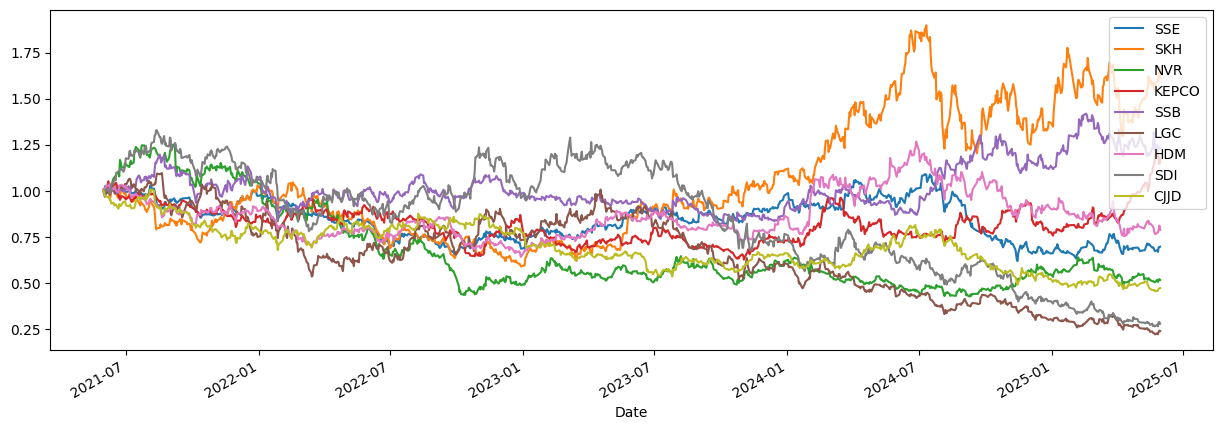

In [5]:
# plotting
(p_KR/p_KR.iloc[0]).plot(figsize=(15,5))

#### Creation weights (random)

In [6]:
weights=np.random.rand(len(Tech_KR))
weights=weights/np.sum(weights)
weights

array([0.09029062, 0.09426576, 0.12856692, 0.03256815, 0.16623156,
       0.09979965, 0.14573641, 0.05160188, 0.19093906])

#### Creation Return, Risk (covariance) 

In [7]:
r_a= (p_KR.iloc[-1])/p_KR.iloc[0]-1
port_return= np.dot(weights, r_a)
port_return

np.float64(-0.23102192338433375)

#### Covariance

In [8]:
covar_KR=(p_KR/p_KR.shift()-1).cov()*252
port_risk= np.dot(weights.T, np.dot(covar_KR, weights))
port_risk

np.float64(0.03525168102606542)

In [9]:
covar_KR

,SSE,SKH,NVR,KEPCO,SSB,LGC,HDM,SDI,CJJD
SSE,0.064861,0.060406,0.030169,0.014315,0.013285,0.035123,0.029295,0.034851,0.017852
SKH,0.060406,0.162298,0.040210,0.015747,0.020541,0.043415,0.038353,0.039811,0.020343
NVR,0.030169,0.040210,0.115745,0.020739,0.020720,0.037494,0.022711,0.035610,0.020216
KEPCO,0.014315,0.015747,0.020739,0.090760,0.010913,0.019601,0.016622,0.016353,0.016910
SSB,0.013285,0.020541,0.020720,0.010913,0.080321,0.020998,0.012137,0.027038,0.011732
LGC,0.035123,0.043415,0.037494,0.019601,0.020998,0.179514,0.039860,0.114361,0.024542
HDM,0.029295,0.038353,0.022711,0.016622,0.012137,0.039860,0.084590,0.035687,0.020369
SDI,0.034851,0.039811,0.035610,0.016353,0.027038,0.114361,0.035687,0.169536,0.020249
CJJD,0.017852,0.020343,0.020216,0.016910,0.011732,0.024542,0.020369,0.020249,0.079896


#### Portfolio Return & Risk (Combination of weights)

In [10]:
port_returns=[]
port_risks=[]

for ii in range(3000):
    weights=np.random.rand(len(Tech_KR))
    weights=weights/np.sum(weights)

    r_a= (p_KR.iloc[-1])/p_KR.iloc[0]-1
    port_return= np.dot(weights, r_a)
    
    covar_KR=(p_KR/p_KR.shift()-1).cov()*252
    port_risk= np.dot(weights.T, np.dot(covar_KR, weights))
    
    port_returns.append(port_return)
    port_risks.append(port_risk)

#### Data Check (Portfolio Returns & Risks)

In [13]:
port_returns

[np.float64(-0.28553154667411185),
 np.float64(-0.2359245517070669),
 np.float64(-0.09656576487859853),
 np.float64(-0.16354863402916534),
 np.float64(-0.11908516411808029),
 np.float64(-0.14764407371175256),
 np.float64(-0.0647704404603085),
 np.float64(-0.23388615509158345),
 np.float64(-0.19503781087094413),
 np.float64(-0.10600465477984854),
 np.float64(-0.38190742245343795),
 np.float64(-0.2483913820231448),
 np.float64(-0.13225924331086303),
 np.float64(-0.10316799088949546),
 np.float64(-0.25951097255394406),
 np.float64(-0.11564756454304763),
 np.float64(-0.3679703609015775),
 np.float64(-0.25490613916771754),
 np.float64(-0.15690644195705386),
 np.float64(-0.19691657437782215),
 np.float64(-0.32219626776567456),
 np.float64(-0.18434993953737133),
 np.float64(-0.13633910498248925),
 np.float64(-0.16517266050745777),
 np.float64(-0.4354373612743),
 np.float64(-0.3626228929107572),
 np.float64(-0.2686615514281108),
 np.float64(-0.21666083389427462),
 np.float64(-0.065949410344420

In [14]:
port_risks

[np.float64(0.045510826963957876),
 np.float64(0.04000662602366572),
 np.float64(0.03390772233764786),
 np.float64(0.03223904892697697),
 np.float64(0.04686174940833852),
 np.float64(0.041027376884240525),
 np.float64(0.040310441801184115),
 np.float64(0.03994081882625291),
 np.float64(0.03919770354720738),
 np.float64(0.03491176180198949),
 np.float64(0.04380035671337889),
 np.float64(0.04454939330505202),
 np.float64(0.03761703796156884),
 np.float64(0.03471583102418594),
 np.float64(0.04232966710323047),
 np.float64(0.03653024182665889),
 np.float64(0.042773615469245185),
 np.float64(0.045420187745874537),
 np.float64(0.03240262658582947),
 np.float64(0.036949838179238255),
 np.float64(0.037770909434286494),
 np.float64(0.036886798213166275),
 np.float64(0.046317487035205336),
 np.float64(0.039324216052619564),
 np.float64(0.050542644498952564),
 np.float64(0.05059168441044427),
 np.float64(0.04293418605126065),
 np.float64(0.04544248017053962),
 np.float64(0.036364879588080073),
 n

In [15]:
port_returns = np.array(port_returns)
port_risks= np.array(port_risks)

#### Draw graph (Scattering Portfolio Risk & Return

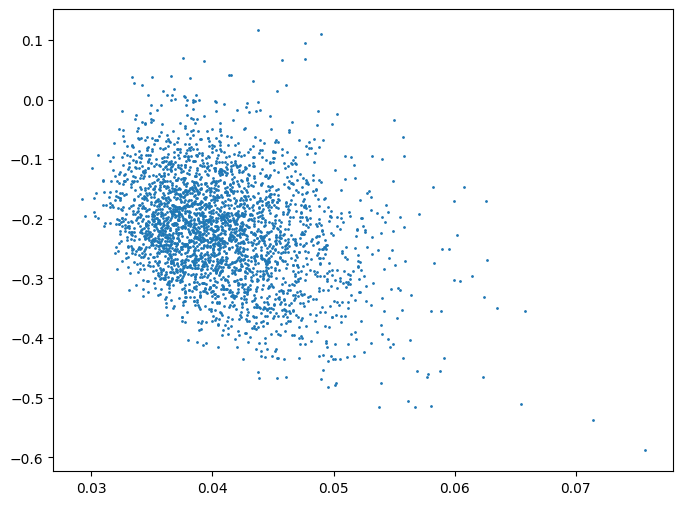

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(port_risks, port_returns, s=1)

#### Draw graph (according to Sharpe Ratio)

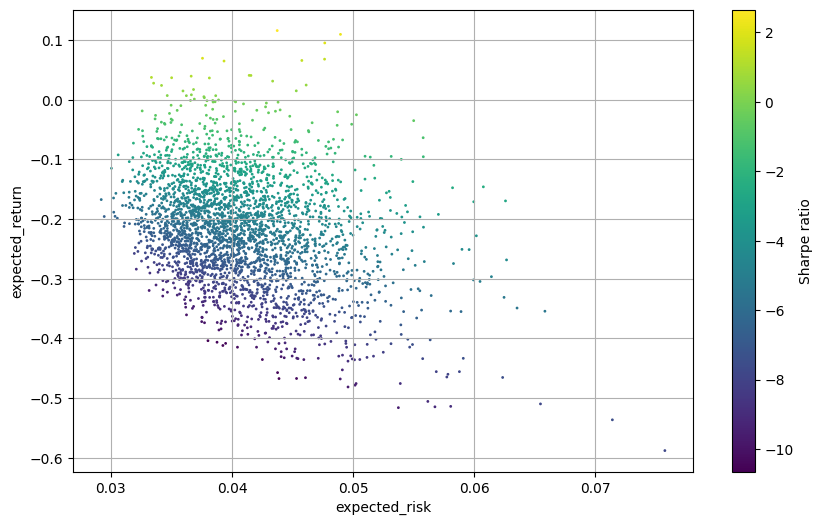

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(port_risks, port_returns, s=1, c=port_returns/port_risks)
plt.colorbar(label='Sharpe ratio')
plt.xlabel('expected_risk')
plt.ylabel('expected_return')
plt.grid(True)
plt.show()

#### Minimize(목적함수, w0, constraints=, bounds= )

In [19]:
# 목적함수 정의
# 먼저, weights를 넣으면, return, risk, sharperaio를 return하는 함수를 정의 => 목적함수 정의 
def get_stats(weights):
    r_a= (p_KR.iloc[-1])/p_KR.iloc[0]-1
    port_return= np.dot(weights, r_a)
    covar_KR=(p_KR/p_KR.shift(1)-1).cov()*252
    port_risk= np.dot(weights.T, np.dot(covar_KR, weights))
    port_sharpe= port_return/ port_risk
    return [port_return, port_risk, port_sharpe]

def objective_return(weights):
    return -get_stats(weights)[0]

def objective_risk(weights):
    return get_stats(weights)[1]

def objective_sharpe(weights):
    return -get_stats(weights)[2]

#### Optimization (최적화 문제 정의) Check

In [20]:
get_stats(weights)

[np.float64(-0.15861348689052304),
 np.float64(0.04478488208187028),
 np.float64(-3.5416747687437278)]

In [21]:
# w0 정의 
w0=np.ones(len(Tech_KR))/len(Tech_KR)

In [23]:
# constraints 정의
constraints={'type':'eq', 'fun': lambda x: np.sum(x)-1 }

In [24]:
# bounds 정의
bound=(0,1)
bounds= tuple(bound for ii in range(len(Tech_KR)))

#### Optimization (Minimize Risk & Maximize Sharpe Ratio) # 최적화 1. Risk 최소

In [25]:
# 최적화 1. Risk 최소
opt_risk= minimize(objective_risk, w0, constraints=constraints, bounds=bounds)
# 최적화 2. Sharpe ratio 최대
opt_sharpe= minimize(objective_sharpe, w0, constraints=constraints, bounds=bounds )

In [26]:
# 최적화된 risk, # 그 시점의 weights (포트폴리오)
opt_risk['fun'] # 최적화된 risk
opt_risk['x'] # 그 조건의 weights (포트폴리오)

array([2.08948537e-01, 4.01154804e-18, 5.69637544e-02, 1.76769899e-01,
       2.30563085e-01, 0.00000000e+00, 1.32281625e-01, 8.32394872e-03,
       1.86149150e-01])

In [27]:
# 최적화된 Sharpe Ratio, # 그 시점의 weights (포트폴리오)
-opt_sharpe['fun'] # 최적화된 sharperatio
opt_sharpe['x'] # 그 조건의 weights (포트폴리오)

array([0.00000000e+00, 3.31282074e-01, 7.75902979e-14, 2.94003669e-01,
       3.74714257e-01, 3.65244982e-13, 0.00000000e+00, 3.27922764e-13,
       0.00000000e+00])

#### Efficient investment point

In [28]:
 # 효율적 투자점 : 목표 수익을 달성하기 위한 최소 risk를 가질 수 있는 포트폴리오 (수익률 Min, 수익률 Max, 투자 조합수)
target_returns= np.linspace(0.05, 0.5, 50)

In [29]:
target_risks=[]
target_port={}

for target_return in target_returns:
    constraints= ({'type':'eq', 'fun': lambda x: np.sum(x)-1 }, 
                  {'type':'eq', 'fun': lambda x:get_stats(x)[0]-target_return})
    opt_target=minimize(objective_risk, w0, constraints=constraints, bounds=bounds)
    target_risks.append(opt_target['fun'])
    target_port[target_return]=opt_target['x']
    
target_risks=np.array(target_risks)

#### Draw Stock Allocation

<Axes: >

<Figure size 1000x600 with 0 Axes>

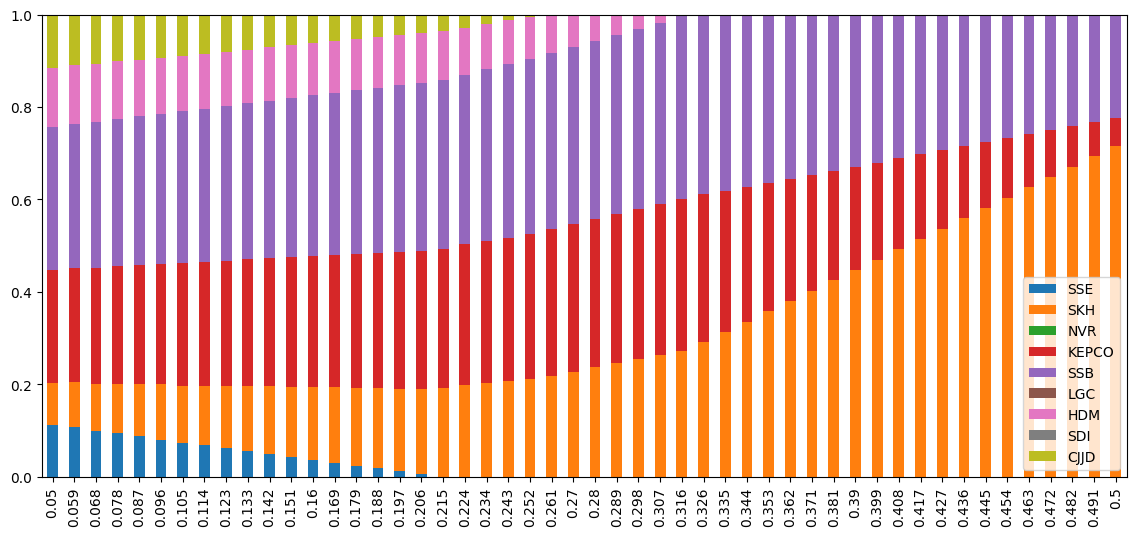

In [30]:
plt.figure(figsize=(10, 6))
w=pd.DataFrame(target_port.values())
w.columns=['SSE', 'SKH', 'NVR', 'KEPCO','SSB', 'LGC', 'HDM', 'SDI', 'CJJD']
w.index=target_returns.round(3)
w.plot(figsize=(14,6), kind='bar', stacked=True)

#### Draw Efficient Frontier (according to Sharpe Ratio)

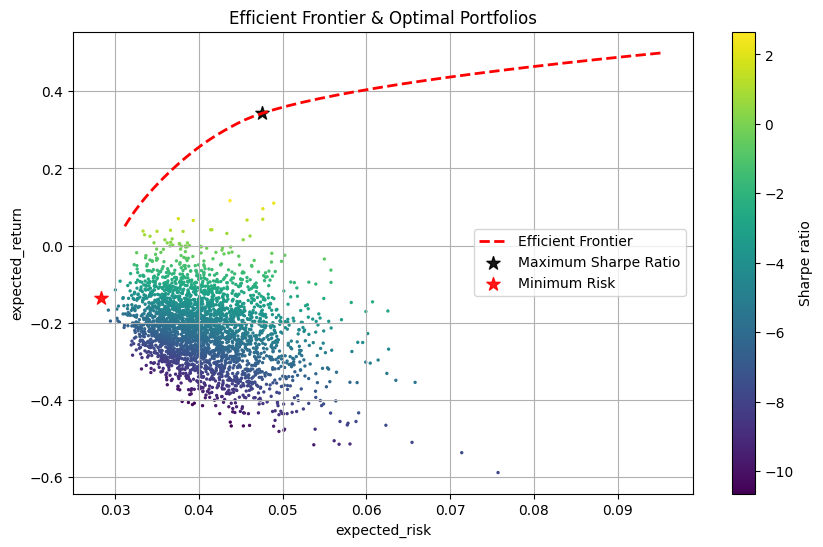

In [31]:
# 효율적 투자선 시각화
plt.figure(figsize=(10, 6))
plt.scatter(port_risks, port_returns, s=2, c=np.array(port_returns)/np.array(port_risks), cmap='viridis')

plt.plot(target_risks, target_returns, 'r--', linewidth=2, label='Efficient Frontier')
plt.colorbar(label='Sharpe ratio')

pt_opt_sharpe=get_stats(opt_sharpe['x'])
plt.scatter(pt_opt_sharpe[1], pt_opt_sharpe[0], marker='*', s=100, c='black', label='Maximum Sharpe Ratio', alpha=0.9)
 
pt_opt_risk=get_stats(opt_risk['x'])
plt.scatter(pt_opt_risk[1], pt_opt_risk[0], marker='*', s=100, c='red', label='Minimum Risk', alpha=0.9)

plt.title('Efficient Frontier & Optimal Portfolios')
plt.xlabel('expected_risk')
plt.ylabel('expected_return')
plt.legend()
plt.grid(True)
plt.show()

#### Maximum Sharpe Ratio 포트폴리오, Minimum Risk 포트폴리오

In [32]:
#  Maximum Sharpe Ratio 포트폴리오
print(f" Maximum Sharpe Ratio Portfolio:")
print(f"  - Expected Return: {pt_opt_sharpe[0]:.4f}")
print(f"  - Expected Risk  : {pt_opt_sharpe[1]:.4f}")
print(f"  - Sharpe Ratio   : {pt_opt_sharpe[2]:.4f}")

# Minimum Risk 포트폴리오
print(f"\n Minimum Risk Portfolio:")
print(f"  - Expected Return: {pt_opt_risk[0]:.4f}")
print(f"  - Expected Risk  : {pt_opt_risk[1]:.4f}")
print(f"  - Sharpe Ratio   : {pt_opt_risk[2]:.4f}")

 Maximum Sharpe Ratio Portfolio:
  - Expected Return: 0.3424
  - Expected Risk  : 0.0475
  - Sharpe Ratio   : 7.2064

 Minimum Risk Portfolio:
  - Expected Return: -0.1369
  - Expected Risk  : 0.0283
  - Sharpe Ratio   : -4.8305


## 2.  Yahoo Finance

#### Import library

In [33]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import minimize 

#### Stock Selection : Get price & Dividend

In [80]:
Tech_KR=['005930.KS','000660.KS','035420.KS', '015760.KS', '207940.KS', '051910.KS','005380.KS', '006400.KS','097950.KS'] 
#삼성전자,  SK하이닉스, 네이버,     한국전력,    삼성바이로직스, LG화학,    현대차,      삼성SDI,  CJ제일제당

def get_price(companies): 
    df=pd.DataFrame()
    for company in companies:
        df[company]=yf.Ticker(company).history(start='2019-05-31', end='2025-05-31')['Close']
    return df

def get_div(companies): 
    df=pd.DataFrame()
    for company in companies:
        df[company]=yf.Ticker(company).history(start='2019-05-31', end='2025-05-31')['Dividends']
    return df

p_KR=get_price(Tech_KR)
d_KR=get_div(Tech_KR)

p_KR.columns=['SSE', 'SKH', 'NVR', 'KEPCO','SSB', 'LGC', 'HDM', 'SDI', 'CJJD']
d_KR.columns=['SSE', 'SKH', 'NVR', 'KEPCO','SSB', 'LGC', 'HDM', 'SDI', 'CJJD']

#### Data Check

In [81]:
p_KR.head()

,SSE,SKH,NVR,KEPCO,SSB,LGC,HDM,SDI,CJJD
Date,,,,,,,,,
2019-05-31 00:00:00+09:00,36330.820312,61290.187500,109267.039062,24571.935547,296848.93750,312048.78125,106639.960938,218500.0,254180.000000
2019-06-03 00:00:00+09:00,37442.113281,62510.355469,112696.937500,25186.234375,297343.68750,315797.15625,109811.406250,225000.0,253726.875000
2019-06-04 00:00:00+09:00,37142.925781,61102.457031,108777.054688,24571.935547,311196.65625,316265.65625,110207.851562,228500.0,255539.234375
2019-06-05 00:00:00+09:00,37527.601562,61102.457031,108287.062500,24288.412109,308722.90625,310643.18750,111793.554688,225000.0,255539.234375
2019-06-07 00:00:00+09:00,37784.042969,61384.035156,108777.054688,24288.412109,302291.18750,309706.06250,111000.710938,230000.0,253726.875000


#### Creation weights (random)

In [82]:
weights=np.random.rand(len(Tech_KR))
weights=weights/np.sum(weights)
weights

array([0.14394097, 0.0474938 , 0.03714187, 0.15597383, 0.16415342,
       0.19585819, 0.2021912 , 0.04281631, 0.01043039])

#### Creation Return, Risk (covariance)

In [83]:
r_a= (p_KR.iloc[-1]+d_KR.sum())/p_KR.iloc[0]-1
port_return= np.dot(weights, r_a)
port_return

np.float64(0.8932726964148949)

In [84]:
covar_KR=(p_KR/p_KR.shift()-1).cov()*252
port_risk= np.dot(weights.T, np.dot(covar_KR, weights))
port_risk

np.float64(0.05150544864472005)

#### Portfolio Return & Risk (Combination of weights) 

In [85]:
port_returns=[]
port_risks=[]

for ii in range(3000):
    weights=np.random.rand(len(Tech_KR))
    weights=weights/np.sum(weights)  
    
    r_a= (p_KR.iloc[-1]+d_KR.sum())/p_KR.iloc[0]-1
    port_return= np.dot(weights, r_a) 
    covar_KR=(p_KR/p_KR.shift()-1).cov()*252
    port_risk= np.dot(weights.T, np.dot(covar_KR, weights))

    port_returns.append(port_return)
    port_risks.append(port_risk)

#### Data Check (Portfolio Returns & Risks)

In [86]:
port_returns
port_risks
port_returns = np.array(port_returns)
port_risks= np.array(port_risks)

#### Draw graph (Scattering Portfolio Risk & Return)

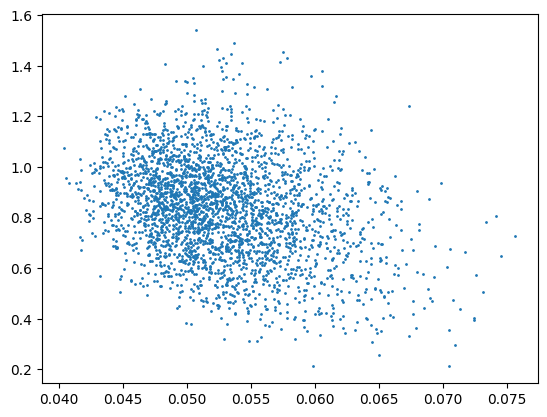

In [87]:
plt.scatter(port_risks, port_returns, s=1)

#### Draw graph (according to Sharpe Ratio)

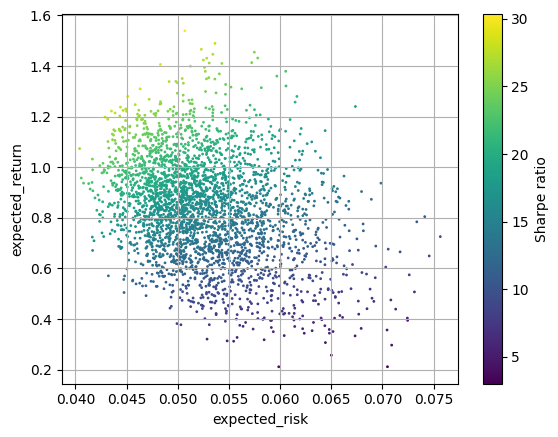

In [88]:
plt.scatter(port_risks, port_returns, s=1, c=port_returns/port_risks)
plt.colorbar(label='Sharpe ratio')
plt.xlabel('expected_risk')
plt.ylabel('expected_return')
plt.grid(True)
plt.show()

#### Minimize(목적함수, w0, constraints=, bounds= )

In [89]:
# 목적함수 정의
# 먼저, weights를 넣으면, return, risk, sharperaio를 return하는 함수를 정의 => 목적함수 정의 
def get_stats(weights):
    r_a= (p_KR.iloc[-1]+d_KR.sum())/p_KR.iloc[0]-1
    port_return= np.dot(weights, r_a)
    covar_KR=(p_KR/p_KR.shift(1)-1).cov()*252
    port_risk= np.dot(weights.T, np.dot(covar_KR, weights))
    port_sharpe= port_return/ port_risk
    return [port_return, port_risk, port_sharpe]

def objective_return(weights):
    return -get_stats(weights)[0]

def objective_risk(weights):
    return get_stats(weights)[1]

def objective_sharpe(weights):
    return -get_stats(weights)[2]

#### Optimization (최적화 문제 정의) Check

In [90]:
get_stats(weights)

[np.float64(0.7795799959465752),
 np.float64(0.05197939517035628),
 np.float64(14.997865854183077)]

In [91]:
# w0 정의 
w0=np.ones(len(Tech_KR))/len(Tech_KR)

In [92]:
# constraints 정의
constraints={'type':'eq', 'fun': lambda x: np.sum(x)-1 }

In [93]:
# bounds 정의
bound=(0,1)
bounds= tuple(bound for ii in range(len(Tech_KR)))

#### Optimization (Minimize Risk & Maximize Sharpe Ratio) # 최적화 1. Risk 최소

In [94]:
# Optimization 1. Minimize  Risk 
opt_risk= minimize(objective_risk, w0, constraints=constraints, bounds=bounds)
# Optimization 2. Maximize Sharpe ration 
opt_sharpe= minimize(objective_sharpe, w0, constraints=constraints, bounds=bounds) 

#### 최적화된 risk, # 그 시점의 weights (포트폴리오)

In [95]:
opt_risk['fun'] # Optimized risk
opt_risk['x']    # Portfolio weights 

array([2.88309927e-01, 3.99799551e-18, 1.05109765e-01, 2.39819151e-01,
       1.73711878e-01, 7.92822839e-19, 6.96128183e-02, 0.00000000e+00,
       1.23436460e-01])

#### 최적화된 Sharpe Ratio, # 그 시점의 weights (포트폴리오)

In [96]:
-opt_sharpe['fun'] # Optimized sharperatio
opt_sharpe['x']     # Portfolio weights

array([6.75388259e-02, 2.14802900e-01, 5.81999629e-02, 1.35363393e-01,
       4.13061534e-01, 2.53122643e-12, 1.11033383e-01, 2.81628699e-12,
       0.00000000e+00])

#### Draw Efficient Frontier (according to Sharpe Ratio)

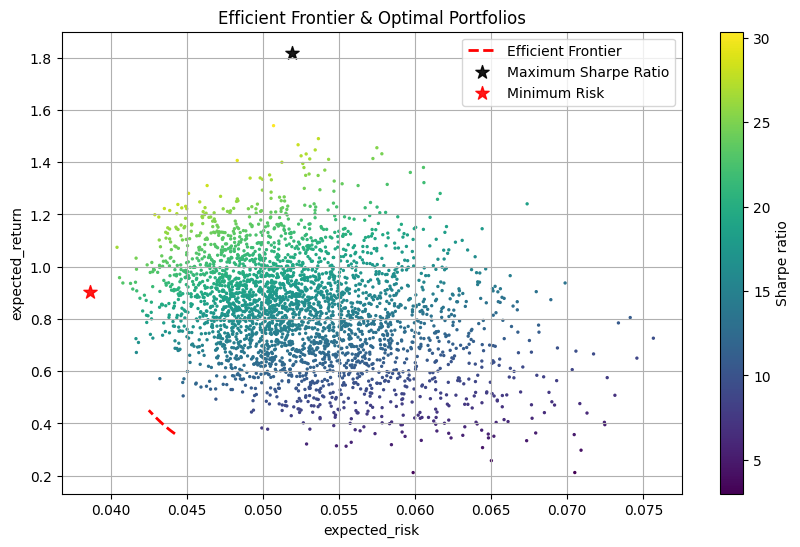

In [97]:
# 효율적 투자선 시각화
plt.figure(figsize=(10, 6))
plt.scatter(port_risks, port_returns, s=2, c=np.array(port_returns)/np.array(port_risks), cmap='viridis')
plt.plot(target_risks, target_returns, 'r--', linewidth=2, label='Efficient Frontier')
plt.colorbar(label='Sharpe ratio')

pt_opt_sharpe=get_stats(opt_sharpe['x'])
plt.scatter(pt_opt_sharpe[1], pt_opt_sharpe[0], marker='*', s=100, c='black', label='Maximum Sharpe Ratio', alpha=0.9)
pt_opt_risk=get_stats(opt_risk['x'])
plt.scatter(pt_opt_risk[1], pt_opt_risk[0], marker='*', s=100, c='red', label='Minimum Risk', alpha=0.9)
plt.title('Efficient Frontier & Optimal Portfolios')
plt.xlabel('expected_risk')
plt.ylabel('expected_return')
plt.legend()
plt.grid(True)
plt.show()

####  Efficient investment point

In [98]:
# 효율적 투자점 : 목표 수익을 달성하기 위한 최소 risk를 가질 수 있는 포트폴리오 (수익률 Min, 수익률 Max, 투자 조합수)
target_returns= np.linspace(0.36, 0.45, 50)

In [ ]:
target_risks=[]
target_port={}

for target_return in target_returns:
    constraints= ({'type':'eq', 'fun': lambda x: np.sum(x)-1 }, {'type':'eq', 'fun': lambda x:get_stats(x)[0]-target_return})
    opt_target=minimize(objective_risk, w0, constraints=constraints, bounds=bounds)
    target_risks.append(opt_target['fun'])
    target_port[target_return]=opt_target['x']

target_risks=np.array(target_risks)

#### Draw Stock Allocation

<Axes: >

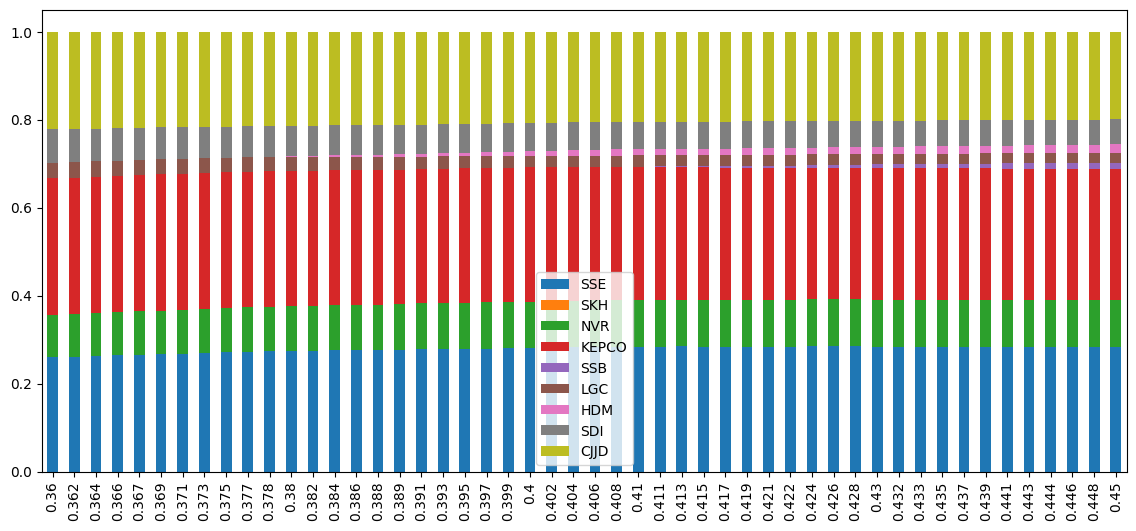

In [ ]:
w=pd.DataFrame(target_port.values())
w.columns=['SSE', 'SKH', 'NVR', 'KEPCO','SSB', 'LGC', 'HDM', 'SDI', 'CJJD']
w.index=target_returns.round(3)
w.plot(figsize=(14,6), kind='bar', stacked=True)